In [4]:
from keras import models
from keras import layers,datasets

Using TensorFlow backend.


In [5]:
from keras import losses

In [7]:
import os
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg
from matplotlib.image import imread

In [8]:
from PIL import Image
from numpy import asarray

In [9]:
import numpy as np
import pandas as pd

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [11]:
from sklearn import decomposition

In [12]:
import random

In [14]:
DIR_TRAIN = "./train_birds"

In [15]:
num_draw=3

In [16]:
classes = os.listdir(DIR_TRAIN)
classes=np.random.choice(classes,num_draw)

classes

array(['FLAMINGO', 'SUPERB STARLING', 'DOWNY WOODPECKER'], dtype='<U25')

In [17]:
cnt_tr=20
cnt_vl_lo=60
cnt_vl_hi=65
cnt_ts_lo=80
cnt_ts_hi=85

In [18]:
%%time
def extract_3D(classes,cnt_tr,cnt_vl_lo, cnt_vl_hi, cnt_ts_lo, cnt_ts_hi):

    train_imgs = []
    for _class in classes:
        for i,img in enumerate(os.listdir(DIR_TRAIN + '/' + _class)):
            if i==cnt_tr:
                break
            s=DIR_TRAIN + '/' + _class+'/'+img

            image = Image.open(s).convert("RGB")
            # convert image to numpy array
            img_np = asarray(image)
            train_imgs.append(img_np)
    
    val_imgs = []
    for _class in classes:
        for i,img in enumerate(os.listdir(DIR_TRAIN + '/' + _class)):
            if i<cnt_vl_lo:
                continue
            elif i>=cnt_vl_hi:
                break        
            else:             
                s=DIR_TRAIN + '/' + _class+'/'+img
                print(s)
                image = Image.open(s).convert("RGB")
                # convert image to numpy array
                img_np = asarray(image)
                val_imgs.append(img_np) 
                
    test_imgs = []
    for _class in classes:
        for i,img in enumerate(os.listdir(DIR_TRAIN + '/' + _class)):
            if i<cnt_ts_lo:
                continue
            elif i>=cnt_ts_hi:
                break        
            else:             
                s=DIR_TRAIN + '/' + _class+'/'+img
                print(s)
                image = Image.open(s).convert("RGB")
                # convert image to numpy array
                img_np = asarray(image)
                test_imgs.append(img_np) 
    
    act_tr=np.array(train_imgs)
#     train_np=act_tr.reshape(act_tr.shape[0],-1)/255.
    train_np=act_tr/255.
    print("train images shape:",train_np.shape)
    
    act_vl=np.array(val_imgs)
#     test_np=act_ts.reshape(act_ts.shape[0],-1)/255.
    val_np=act_vl/255.
    print("val images shape:",val_np.shape)
    
    act_ts=np.array(test_imgs)
    test_np=act_ts/255.    
    
    
    train_lbls = []
    for _class in classes:
        for i,img in enumerate(os.listdir(DIR_TRAIN + '/' + _class)):
            if i==cnt_tr:
                break
            s=DIR_TRAIN + '/' + _class+'/'+img
            label = s.split("/")[-2]
            train_lbls.append(label)
#             print(label)
            
    
    val_lbls = []
    for _class in classes:
        for i,img in enumerate(os.listdir(DIR_TRAIN + '/' + _class)):
            if i<cnt_vl_lo:
                continue
            elif i>=cnt_vl_hi:
                break        
            else:  
                s=DIR_TRAIN + '/' + _class+'/'+img
                label = s.split("/")[-2]
                val_lbls.append(label)
#                 print("test",label)

    test_lbls = []
    for _class in classes:
        for i,img in enumerate(os.listdir(DIR_TRAIN + '/' + _class)):
            if i<cnt_ts_lo:
                continue
            elif i>=cnt_ts_hi:
                break        
            else:  
                s=DIR_TRAIN + '/' + _class+'/'+img
                label = s.split("/")[-2]
                test_lbls.append(label)
            
    
    classes_2int = {classes[i]: i for i in range(len(classes))}
    print("Number of Classes:",len(classes_2int))
    
    
    train_lbls_int=[classes_2int.get(train_lbls[i]) for i in range(len(train_lbls))]
    train_lbls_int=np.array(train_lbls_int)
    print("Number of Training Labels:",len(train_lbls_int))
    
    val_lbls_int=[classes_2int.get(val_lbls[i]) for i in range(len(val_lbls))]
    val_lbls_int=np.array(val_lbls_int)
    print("Number of Validation Labels:",len(val_lbls_int))
    
    test_lbls_int=[classes_2int.get(test_lbls[i]) for i in range(len(test_lbls))]
    test_lbls_int=np.array(test_lbls_int)
    print("Number of Testing Labels:",len(test_lbls_int))
    
    return train_np,val_np, test_np,train_lbls_int, val_lbls_int ,  test_lbls_int,act_tr, act_vl,act_ts        

Wall time: 0 ns


In [19]:
train_imgs,val_imgs, test_imgs, train_lbls, val_lbls, test_lbls,act_tr, act_vl,act_ts =extract_3D(classes,cnt_tr,
                                                                                           cnt_vl_lo, cnt_vl_hi, 
                                                                                          cnt_ts_lo, cnt_ts_hi)

./train_birds/FLAMINGO/061.jpg
./train_birds/FLAMINGO/062.jpg
./train_birds/FLAMINGO/063.jpg
./train_birds/FLAMINGO/064.jpg
./train_birds/FLAMINGO/065.jpg
./train_birds/SUPERB STARLING/061.jpg
./train_birds/SUPERB STARLING/062.jpg
./train_birds/SUPERB STARLING/063.jpg
./train_birds/SUPERB STARLING/064.jpg
./train_birds/SUPERB STARLING/065.jpg
./train_birds/DOWNY WOODPECKER/061.jpg
./train_birds/DOWNY WOODPECKER/062.jpg
./train_birds/DOWNY WOODPECKER/063.jpg
./train_birds/DOWNY WOODPECKER/064.jpg
./train_birds/DOWNY WOODPECKER/065.jpg
./train_birds/FLAMINGO/081.jpg
./train_birds/FLAMINGO/082.jpg
./train_birds/FLAMINGO/083.jpg
./train_birds/FLAMINGO/084.jpg
./train_birds/FLAMINGO/085.jpg
./train_birds/SUPERB STARLING/081.jpg
./train_birds/SUPERB STARLING/082.jpg
./train_birds/SUPERB STARLING/083.jpg
./train_birds/SUPERB STARLING/084.jpg
./train_birds/SUPERB STARLING/085.jpg
./train_birds/DOWNY WOODPECKER/081.jpg
./train_birds/DOWNY WOODPECKER/082.jpg
./train_birds/DOWNY WOODPECKER/083.jp

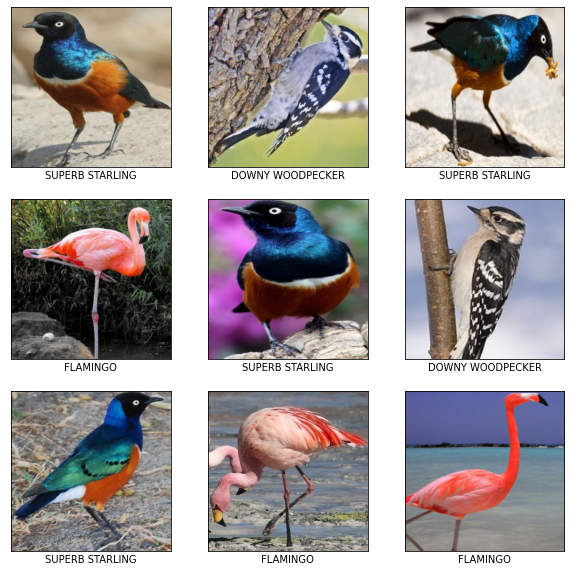

In [20]:
plt.figure(figsize=(10,10))
n=9
rnd_drawn=np.random.choice(train_imgs.shape[0], n, replace=False)
for i,img in enumerate(rnd_drawn):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)    
    plt.imshow(act_tr[img], cmap=plt.cm.binary)

    plt.xlabel(classes[train_lbls[img]])

In [23]:
def CvVgg():
    
    
    model = models.Sequential()
    
    model.add(base_model)
    model.add(layers.Flatten())
    model.add(layers.Dense(2048,activation='relu',kernel_initializer='he_normal'))
    model.add(layers.Dropout(0.35))
    model.add(layers.Dense(2048,activation='relu',kernel_initializer='he_normal'))
    model.add(layers.Dropout(0.35))
    model.add(layers.Dense(len(classes),activation='softmax',kernel_initializer='glorot_normal'))

    model.compile(optimizer='adam',
              loss=losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
    return model

In [27]:
def Conv():
    model = models.Sequential()
    
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(train_imgs.shape[1], 
                                                                        train_imgs.shape[2],train_imgs.shape[3])))
    model.add(layers.Conv2D(32, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(32, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
#     model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
#     model.add(layers.Conv2D(128, (3, 3), activation='relu'))
#     model.add(layers.MaxPooling2D((2, 2)))
#     model.add(layers.Conv2D(256, (3, 3), activation='relu'))
#     model.add(layers.Conv2D(256, (3, 3), activation='relu'))
#     model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
#     model.add(layers.Conv2D(256, (3, 3), activation='relu'))
#     model.add(layers.Conv2D(256, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
#     model.add(layers.Conv2D(512, (3, 3), activation='relu'))
#     model.add(layers.Conv2D(512, (3, 3), activation='relu'))
       
    model.add(layers.Flatten())
    model.add(layers.Dense(64,activation='relu'))#,kernel_initializer='he_normal'))
    model.add(layers.Dropout(0.35))
    model.add(layers.Dense(512,activation='relu',kernel_initializer='he_normal'))
#     model.add(layers.Dropout(0.35))
#     model.add(layers.Dense(128,activation='relu',kernel_initializer='he_normal'))
#     model.add(layers.Dropout(0.35))
#     model.add(layers.Dense(2,activation='relu',kernel_initializer='he_normal'))
#     model.add(layers.Dropout(0.35))
       
    model.add(layers.Dense(len(classes),activation='softmax'))#,kernel_initializer='glorot_normal'))


    model.compile(optimizer='adam',
              loss=losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
    return model

In [28]:
%%time
conv=Conv()

Wall time: 296 ms


In [29]:
conv.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 220, 220, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 110, 110, 32)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 108, 108, 32)      9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 52, 52, 64)        18496     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 50, 50, 64)       

In [30]:
%%time
model_fitted=conv.fit(train_imgs, train_lbls,epochs=10,validation_data=(val_imgs, val_lbls))

Train on 60 samples, validate on 15 samples
Epoch 1/10
60/60 [==============================] - 8s 129ms/step - loss: 1.0994 - accuracy: 0.2667 - val_loss: 1.0981 - val_accuracy: 0.5333
Epoch 2/10
60/60 [==============================] - 6s 96ms/step - loss: 1.0983 - accuracy: 0.3667 - val_loss: 1.0958 - val_accuracy: 0.3333
Epoch 3/10
60/60 [==============================] - 6s 96ms/step - loss: 1.0943 - accuracy: 0.3833 - val_loss: 1.0843 - val_accuracy: 0.3333
Epoch 4/10
60/60 [==============================] - 6s 94ms/step - loss: 1.0731 - accuracy: 0.5000 - val_loss: 1.0258 - val_accuracy: 0.3333
Epoch 5/10
60/60 [==============================] - 6s 95ms/step - loss: 1.0187 - accuracy: 0.5667 - val_loss: 0.9340 - val_accuracy: 0.8000
Epoch 6/10
60/60 [==============================] - 6s 95ms/step - loss: 0.9065 - accuracy: 0.7167 - val_loss: 0.8971 - val_accuracy: 0.8000
Epoch 7/10
60/60 [==============================] - 6s 95ms/step - loss: 0.8155 - accuracy: 0.8167 - val_loss

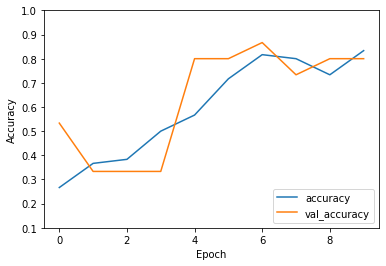

In [31]:
plt.plot(model_fitted.history['accuracy'], label='accuracy')
plt.plot(model_fitted.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.1, 1])
plt.legend(loc='lower right')

val_loss, val_acc = conv.evaluate(val_imgs,  val_lbls, verbose=2)

In [32]:
np.around(conv.predict(test_imgs[2:4]))

array([[0., 1., 0.],
       [0., 1., 0.]], dtype=float32)

In [33]:
test_lbls[2:4]

array([0, 0])

In [48]:
predictions = conv.predict(test_imgs)
predictions

array([[1.00000000e+00, 2.30199044e-16, 2.91092350e-22],
       [1.00000000e+00, 2.73704153e-08, 5.51075027e-20],
       [4.21825360e-04, 5.64378858e-01, 4.35199320e-01],
       [2.65289424e-03, 9.97347116e-01, 3.90892967e-17],
       [9.99400377e-01, 5.99639548e-04, 4.29627941e-34],
       [2.05067522e-06, 9.99033570e-01, 9.64412407e-04],
       [6.90230227e-05, 9.99608696e-01, 3.22251668e-04],
       [2.42968326e-05, 9.99975681e-01, 1.93021868e-15],
       [7.29385718e-10, 1.00000000e+00, 2.19067928e-12],
       [9.99900222e-01, 9.97473180e-05, 1.92222557e-23],
       [1.52802982e-04, 1.21386331e-02, 9.87708569e-01],
       [2.37636210e-04, 1.38726365e-02, 9.85889673e-01],
       [1.16071745e-03, 1.69820726e-01, 8.29018593e-01],
       [3.95852170e-04, 1.09647289e-01, 8.89956892e-01],
       [1.50381622e-03, 3.18922997e-02, 9.66603875e-01]], dtype=float32)

In [42]:
np.argmax(predictions[0])

0

In [43]:
classes[0]

'FLAMINGO'

In [44]:
test_lbls[2]

0

In [38]:
def plot_image(i, predictions_array, test_lbls, img):
    test_lbl, img = test_lbls[i], test_imgs[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == test_lbl:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(classes[predicted_label],
                                100*np.max(predictions_array),
                                classes[test_lbl]),
                                color=color)

In [51]:
def plot_value_array(i, predictions_array, test_lbls):
    test_lbl = test_lbls[i]
    plt.grid(False)
    plt.xticks(range(len(classes)))
    plt.yticks([])
    thisplot = plt.bar(range(len(classes)), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[test_lbl].set_color('blue')

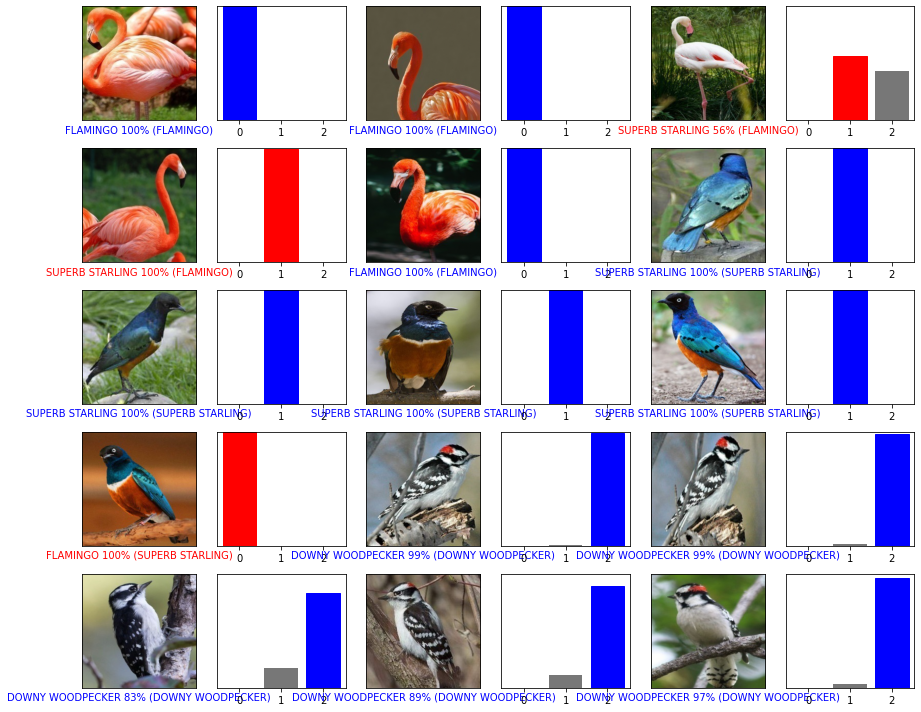

In [54]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_lbls, test_imgs)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_lbls)
plt.tight_layout()
plt.show()